Manually calculated Pearson's r for urban population score and rape arrest rates: 0.41134
scipy.stats person r = 0.41134
P = 0.003000927403016514

The correlation between urban population % and rape arrest rates was statistically significant.


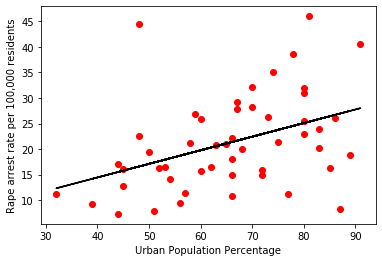

R-squared = 0.17


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import math
import scipy.stats

# importing and subsetting the data

# data obtained from 'https://forge.scilab.org/index.php/p/rdataset/source/tree/master/csv/datasets/USArrests.csv'

# documentation for data: 'https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/USArrests'

dframe = pd.read_csv('USArrests.csv')

dframe.rename(columns = {'Unnamed: 0':'State'}, inplace = True) 

state = dframe['State']
murder = dframe['Murder']
assault = dframe['Assault']
urbpop = dframe['UrbanPop']
rape = dframe['Rape']

# calculating the mean of urban population % and rape arrest rates

urbpop_mean = stats.mean(urbpop)
rape_mean = stats.mean(dframe['Rape'])

# calculating the sum of the products for urban population % and rape arrest rates

urbpop_dev = []
for i in urbpop:
    urbpop_dev.append(i-urbpop_mean)
    
rape_dev = []
for i in dframe['Rape']:
    rape_dev.append(i-rape_mean)
    
product = []

count = 0
if len(urbpop) == len(rape):
    for i in urbpop_dev:
        product.append(i*rape_dev[count])
        count = count + 1
        
SP = sum(product)

# calculating the sum of squares for urban population % and rape arrest rates

SS_urbpop = []
for i in urbpop_dev:
    SS_urbpop.append(i**2)
    
SS_urbpop = sum(SS_urbpop)

SS_rape = []
for i in rape_dev:
    SS_rape.append(i**2)
    
SS_rape = sum(SS_rape)

# calculating pearson's r for urban population % and rape arrest rates
r = SP/math.sqrt(SS_urbpop*SS_rape)

print("Manually calculated Pearson's r for urban population score and rape arrest rates:", round(r,5))

# checking result with scipy.stats

result = scipy.stats.pearsonr(urbpop, rape)

print('scipy.stats person r =', round(result[0],5))
print('P =', result[1])
print()

if result[1] <= 0.5:
    print('The correlation between urban population % and rape arrest rates was statistically significant.')
    
else:
    print('The correlation between urban population % and rape arrest rates was not statistically significant.')
    
# plotting the data

plt.scatter(urbpop, rape, color = 'red')
plt.xlabel("Urban Population Percentage")
plt.ylabel("Rape arrest rate per 100,000 residents")

# calculating and plotting the linear regression equation for urbane population % and rape arrest rate

b = SP/SS_urbpop
intercept = rape_mean - b*urbpop_mean

yhat = urbpop*b + intercept

plt.plot(urbpop, yhat, color = 'black')
plt.show()

print('R-squared =', round(r**2,2))